### 1.search-in-row-wise-and-column-wise-sorted-matrix

In [ ]:
def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
    if matrix == [] or matrix == [[]]:
        return False
    i = 0
    n = len(matrix)
    m = len(matrix[0])
    j = m-1
    while(i<n and j>=0):
        if matrix[i][j] == target:
            return True
        elif matrix[i][j] > target:
            j-=1
        elif matrix[i][j] <target:
            i+=1
    return False

### 2. Check if a binary tree is subtree of another binary tree


In [ ]:
class Solution:
    def isSame(self,s,t):
        if s is None or t is None:
            return s == None and t == None
        elif s.val == t.val:
            return self.isSame(s.left,t.left) and self.isSame(s.right,t.right)
        else:
            return False
    def isSubtree(self, s: TreeNode, t: TreeNode) -> bool:
        if s is None:
            return False
        elif self.isSame(s,t):
            return True
        else:
            return self.isSubtree(s.left,t) or self.isSubtree(s.right,t)
# time complexity O(m*n) for every m nodes of s we check the whole tree
# space complexity O(min(m,n)) as recursion will go to min no nodes in the tree

### 3. Implement Undo and Redo features of a Text Editor

In [9]:
def querry(Q):
    redo = []
    undo = []
    for i in range(len(Q)):
        q = Q[i].split(' ')
       
        if q[0] == "WRITE":
            undo.append(q[1])
            #rint(undo)
        
        elif q[0] == "UNDO":
            element = undo.pop()
            redo.append(element)
        elif q[0] == "REDO":
            element1= redo.pop()
            undo.append(element1)
        else:
            print(*undo)
        
Q = [ "WRITE A", "WRITE B", "WRITE C", "UNDO", "READ", "REDO", "READ" ]
querry(Q)

A B
A B C


### 4. Merge two sorted linked list

In [10]:
class Solution:
    def mergeTwoLists(self, l1: ListNode, l2: ListNode) -> ListNode:
        dummy = curr = ListNode(0)
        while l1 and l2:
            if l1.val < l2.val:
                curr.next = l1
                l1 = l1.next
            else:
                curr.next = l2
                l2 = l2.next
            curr = curr.next
        curr.next = l1 or l2
        return dummy.next
## inplace or recursive
def merge( h1, h2): 
    if (h1 == None): 
        return h2 
    if (h2 == None): 
        return h1 
  
    # start with the linked list 
    # whose head data is the least 
    if (h1.data < h2.data): 
        h1.next = merge(h1.next, h2) 
        return h1 
      
    else: 
        h2.next = merge(h1, h2.next) 
        return h2 

NameError: name 'ListNode' is not defined

### 5. Two Sum

In [ ]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        '''
        result = 0
        i = 0
        arr = []
        while result != target:
            result+=nums[i]
            if target - result >=nums[i] or target-result == 0:
                arr.append(i)
            else:
                result-=nums[i]
        return arr
        '''
        '''
        for i in range(len(nums)):
            for j in range(i+1,len(nums)):
                if nums[j] == target- nums[i]:
                    return [i,j]
        '''
        LookUp = {nums[val]:val for val in range(len(nums))}
        for i in range(len(nums)):
            if target - nums[i] in LookUp and (LookUp[target-nums[i]] !=i):
                return [i,LookUp[target-nums[i]]] 

### 6. Critical Connections in a Network

In [ ]:
from collections import defaultdict

def criticalConnections(n, connections):
    def dfs(node, parent, level):
        if levels[node] is None:
            levels[node] = low[node] = level
            [dfs(neighbour, node, level + 1) for neighbour in graph[node]]
            low[node] = min([level] + [low[neighbour] for neighbour in graph[node] if neighbour != parent])
    graph, levels, low = defaultdict(set), [None] * n, [None] * n
    [(graph[x].add(y), graph[y].add(x)) for x, y in connections], dfs(0, None, 0)
    return [[x, y] for x, y in connections if low[x] > levels[y] or low[y] > levels[x]]

### 7.Clone a linked list

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""

class Solution:
    def copyRandomList(self, head: 'Node') -> 'Node':
        dic = dict()
        m = n = head
        while m:
            dic[m] = Node(m.val)
            m = m.next
        while n:
            dic[n].next = dic.get(n.next)
            dic[n].random = dic.get(n.random)
            n = n.next
        return dic.get(head)

### 8. Kth smallest element from an array of intervals

In [ ]:
# Python3 program to implement
# the above approach
 
# Function to get the Kth smallest
# element from an array of intervals
def KthSmallestNum(arr, n, k):
     
    # Store all the intervals so that it
    # returns the minimum element in O(1)
    pq = []
 
    # Insert all Intervals into the MinHeap
    for i in range(n):
        pq.append([arr[i][0], arr[i][1]])
 
    # Stores the count of
    # popped elements
    cnt = 1
 
    # Iterate over MinHeap
    while (cnt < k):
         
        # Stores minimum element
        # from all remaining intervals
        pq.sort(reverse = True)
        interval = pq[0]
 
        # Remove minimum element
        pq.remove(pq[0])
 
        # Check if the minimum of the current
        # interval is less than the maximum
        # of the current interval
        if (interval[0] < interval[1]):
             
            # Insert new interval
            pq.append([interval[0] + 1, 
                       interval[1]])
 
        cnt += 1
         
    pq.sort(reverse = True)
    return pq[0][0] + 1
 
# Driver Code
if __name__ == '__main__':
     
    # Intervals given
    arr = [ [ 5, 11 ],
            [ 10, 15 ],
            [ 12, 20 ] ]
 
    # Size of the arr
    n = len(arr)
     
    k = 12
     
    print(KthSmallestNum(arr, n, k))

### 9. K largests elements in an array
minheap is used and time complexcity of this is will be O(nlog(k))
<br><b>alternate</b> solution will be using bubble sort and running outer loop for k times and returning last k elements

In [30]:
import heapq
def klarge(arr,k):
    a = []
    for i in arr:
        heapq.heappush(a,i)
        if len(a)>k:
            heapq.heappop(a)
    return a
        
arr = [2,0,5,9,3,5100,8]
k = 2
klarge(arr,k)

[9, 5100]

### 10. Pythagorean Triplet in an array
<b>time complexcity </b> for this is O(n^2) as innner loop aslo can go n times<br>
<b> this is the variation of 3Sum Problem we can also do this prblem using hashmap

In [37]:
def pythogoras(arr):
    n = len(arr)
    for i in range(n):
        arr[i] = ar[i]*arr[i]
    arr.sort()
    for i in range(n-1,1,-1):
        a = arr[i]
        l = 0
        r = i-1
        while(l<r):
            if arr[l]+arr[r] == a:
                print(arr[l],"+",arr[r],"=",a)
                return True
            elif arr[l]+arr[r] > a:
                r-=1
            else:
                l+=1
    return False
ar = [3, 1, 4, 6, 4,8,10] 
pythogoras(ar)

36 + 64 = 100


True

### 11. Inplace rotate square matrix by 90 degrees

In [39]:
def solve(matrix):
    #get trnspose of the matrix
    for i in range(n):
        for i in range(i+1,n):
            swap(matrix[i][j],matirx[j][i])
    for i in range(n):
        print(matrix[i][::-1])

### 13. Design and Implement Special Stack Data Structure | Added Space Optimized Version(min stack)

In [ ]:
class stack:
 
  def __init__(self):
 
    self.array = []
    self.top = -1
    self.max = 100 
 
  # Stack's member method to check 
  # if the stack is iempty
  def isEmpty(self):
 
    if self.top == -1:
        return True
    else:
        return False 
 
  # Stack's member method to check
  # if the stack is full  
  def isFull(self):  
     
    if self.top == self.max - 1:
        return True
    else:
        return False  
 
  # Stack's member method to 
  # insert an element to it   
 
    def push(self, data):
 
    if self.isFull():
      print('Stack OverFlow')
      return
    else:
      self.top += 1
      self.array.append(data)     
 
  # Stack's member method to 
  # remove an element from it 
  def pop(self):
 
    if self.isEmpty():
      print('Stack UnderFlow')
      return
    else: 
      self.top -= 1
      return self.array.pop()
 
# A class that supports all the stack  
# operations and one additional 
# operation getMin() that returns the 
# minimum element from stack at 
# any time.  This class inherits from
# the stack class and uses an 
# auxiliarry stack that holds 
# minimum elements  
class SpecialStack(stack):
 
  def __init__(self):
    super().__init__()
    self.Min = stack()  
 
  # SpecialStack's member method to 
  # insert an element to it. This method 
  # makes sure that the min stack is also
  # updated with appropriate minimum
  # values 
  def push(self, x):
 
    if self.isEmpty():
      super().push(x)
      self.Min.push(x)
    else:
      super().push(x)
      y = self.Min.pop()
      self.Min.push(y)
      if x <= y:
        self.Min.push(x)
      else:
        self.Min.push(y)  
 
  # SpecialStack's member method to  
  # remove an element from it. This 
  # method removes top element from 
  # min stack also. 
  def pop(self):
 
    x = super().pop()
    self.Min.pop()
    return x  
 
  # SpecialStack's member method 
  # to get minimum element from it.
  def getmin(self):
 
    x = self.Min.pop()
    self.Min.push(x)
    return x
 
# Driver code
if __name__ == '__main__':
   
  s = SpecialStack()
  s.push(10)
  s.push(20)
  s.push(30)
  print(s.getmin())
  s.push(5)
  print(s.getmin())
    


### 14. count of an element is sorted array

In [ ]:
def searchRange(self, A, B):
    start = 0
    end = len(A)-1
    res1 = -1
    #res2 = -1
    while start<=end:
        mid = start + (end-start)//2
        if A[mid] == B:
            res1 =  mid
            end = mid - 1
        if A[mid] >= B:
            end = mid -1
        else:
            start = mid+1
    start = 0
    end = len(A)-1
    #res1 = -1
    res2 = -1
    while start<=end:
        mid = start + (end-start)//2
        if A[mid] == B:
            res2 =  mid
            start = mid+1
        if A[mid] > B:
            end = mid -1
        else:
            start = mid+1
    return [res1,res2]

### 15. songs recommendation

In [1]:
from collections import defaultdict
def solve(arr):
    mem = defaultdict(lambda: 0)
    count = 0

    for i, duration in enumerate(arr):
        duration %= 60
        target = (60 - duration)%60
        count += mem[target]
        mem[duration] += 1
    return count

print(solve([60,60,60]))
print(solve([10,50,90,30]))
print(solve([30, 20, 150, 100, 40]))
print(solve([60,60,60]))

3
2
3
3


 Tree, Graph, DP, Stack in decreasing order

# 16. Number of ways to get a given sum with n number of m-faced dices(dice Throw DP)

In [5]:
#  Python program 
#  The main function that returns number of ways to get sum 'x' 
#  with 'n' dice and 'm' with m faces. 
  
def findWays(f, d, s): 
    # Create a table to store results of subproblems. One extra 
    # row and column are used for simpilicity (Number of dice 
    # is directly used as row index and sum is directly used 
    # as column index). The entries in 0th row and 0th column 
    # are never used. 
    mem = [[0 for i in range(s+1)] for j in range(d+1)] 
    # Table entries for no dices 
    # If you do not have any data, then the value must be 0, so the result is 1 
    mem[0][0] = 1
    # Iterate over dices 
    for i in range(1, d+1): 
  
        # Iterate over sum 
        for j in range(1, s+1): 
            # The result is obtained in two ways, pin the current dice and spending 1 of the value, 
            # so we have mem[i-1][j-1] remaining combinations, to find the remaining combinations we 
            # would have to pin the values ??above 1 then we use mem[i][j-1] to sum all combinations 
            # that pin the remaining j-1's. But there is a way, when "j-f-1> = 0" we would be adding 
            # extra combinations, so we remove the combinations that only pin the extrapolated dice face and 
            # subtract the extrapolated combinations. 
            mem[i][j] = mem[i][j - 1] + mem[i - 1][j - 1] 
            if j - f - 1 >= 0: 
                mem[i][j] -= mem[i - 1][j - f - 1] 
    return mem[d][s] 
  
# Driver code 
  
print(findWays(4, 2, 1)) 
print(findWays(2, 2, 3)) 
print(findWays(6, 3, 8)) 
print(findWays(4, 2, 5)) 
print(findWays(4, 3, 5)) 

0
2
21
4
6


# 17. Sieve Prime number

In [4]:
def generatePrime(n):
    primes = [True]*(n+1)
    primes[0] = False
    primes[1] = False
    for p in range(2,int(n**.5)+1):
        if primes[p] == True:
            for i in range(p*p,n+1,p):
                primes[i] = False
    for j in range(0,len(primes)):
        if primes[j]:
            print(j,end = ' ')
generatePrime(12)

def generatePrime(n):
    primes = [True] * (n+1)
    primes[0] = False
    primes[1] = False
    for p in range(2,int(n** .5)+1):
        if primes[p] == True:
            for i in range(p*p, n+1, p):
                primes[i] = False
    for 

2 3 5 7 11 

# 18. Count Inversions

In [3]:
def countInversions(arr):
    count = 0
    for i in range(len(arr)):
        for j in range(i+1,len(arr)):
            if arr[i]>arr[j]:
                count+=1
    print(count)
arr = [3,1,2]
countInversions(arr)

# Using enhanced merge sort

2


# 19.Reverse k alternative nodes in a linked list

In [ ]:
def kAltReverse(head, k) :  
    current = head  
    next = None
    prev = None
    count = 0
  
    #1) reverse first k nodes of the linked list  
    while (current != None and count < k) :  
        next = current.next
        current.next = prev  
        prev = current  
        current = next
        count = count + 1; 
      
    # 2) Now head pos to the kth node.  
    # So change next of head to (k+1)th node 
    if(head != None):  
        head.next = current  
  
    # 3) We do not want to reverse next k  
    # nodes. So move the current  
    # poer to skip next k nodes  
    count = 0
    while(count < k - 1 and current != None ):  
        current = current.next
        count = count + 1
      
    # 4) Recursively call for the list  
    # starting from current.next. And make 
    # rest of the list as next of first node  
    if(current != None):  
        current.next = kAltReverse(current.next, k)  
  
    # 5) prev is new head of the input list  
    return prev  
class Solution:
    # @param A : head node of linked list
    # @param B : integer
    # @return the head node in the linked list
    def solve(self, A, B):
        return kAltReverse(A,B);

# 20. Program to find first letter of each word

# 21. n meetings in a room or train platform problem

In [ ]:
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        intervals.sort(key = lambda x:x[0])
        i=1
        while i<len(intervals):
            if intervals[i][0] <= intervals[i-1][1]:
                intervals[i-1][0] = min(intervals[i][0],intervals[i-1][0])
                intervals[i-1][1] = max(intervals[i][1],intervals[i-1][1])
                del intervals[i]
            else:
                i+=1
        return intervals

# 22. LCS

In [ ]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        n = len(text1)
        m = len(text2)
        dp = [[-1 for x in range(m+1)] for x in range(n+1)]
        def helper(text1,text2,n,m,dp):
            if n == 0 or m == 0:
                return 0
            if dp[n][m] != -1:
                return dp[n][m]
            if text1[n-1] == text2[m-1]:
                dp[n][m] = 1 + helper(text1,text2,n-1,m-1,dp)
                return dp[n][m]
            else:
                dp[n][m] = max(helper(text1,text2,n-1,m,dp),helper(text1,text2,n,m-1,dp))
                return dp[n][m]
        return helper(text1,text2,n,m,dp)

# 23. find minimum height of a tree given its inorder and level order traversal

# 24. Reach Given Score
Consider a game where a player can score 3 or 5 or 10 points in a move. Given a total score n, find number of distinct combinations to reach the given score.

In [ ]:
def count(n): 
  
    # table[i] will store count of solutions for value i. 
    # Initialize all table values as 0. 
    table = [0 for i in range(n+1)] 
  
    # Base case (If given value is 0) 
    table[0] = 1
  
    # One by one consider given 3 moves and update the 
    # table[] values after the index greater than or equal 
    # to the value of the picked move. 
    for i in range(3, n+1): 
        table[i] += table[i-3] 
    for i in range(5, n+1): 
        table[i] += table[i-5] 
    for i in range(10, n+1): 
        table[i] += table[i-10] 
  
    return table[n] 
  
# Driver Program 
n = 20
print('Count for', n, 'is', count(n)) 
  
n = 13
print('Count for', n, 'is', count(n)) 

# 25. Smallest distinct window

In [ ]:
from collections import defaultdict 
  
MAX_CHARS = 256
  
# Function to find smallest window 
# containing all distinct characters 
def findSubString(strr): 
      
    n = len(strr) 
      
    # Count all distinct characters. 
    dist_count = len(set([x for x in strr])) 
      
    curr_count = defaultdict(lambda: 0) 
    count = 0
    start = 0
    min_len = n 
      
    # Now follow the algorithm discussed in below 
    # post. We basically maintain a window of characters 
    # that contains all characters of given string. 
    for j in range(n): 
        curr_count[strr[j]] += 1
          
        # If any distinct character matched, 
        # then increment count 
        if curr_count[strr[j]] == 1: 
            count += 1
              
        # Try to minimize the window i.e., check if 
        # any character is occurring more no. of times 
        # than its occurrence in pattern, if yes 
        # then remove it from starting and also remove 
        # the useless characters. 
        if count == dist_count: 
            while curr_count[strr[start]] > 1: 
                if curr_count[strr[start]] > 1: 
                    curr_count[strr[start]] -= 1
                      
                start += 1
                  
            # Update window size 
            len_window = j - start + 1
              
            if min_len > len_window: 
                min_len = len_window 
                start_index = start 
  
    # Return substring starting from start_index 
    # and length min_len """ 
    return str(strr[start_index: start_index +
                                 min_len]) 
                                   
# Driver code 
if __name__=='__main__': 
      
    print("Smallest window containing " 
          "all distinct characters is: {}".format( 
           findSubString("aabcbcdbca"))) 
  

# 27. Mean Mode Median  

# 28. 

In [16]:
def dfs(grid):
    stack = [(0,0,0)]
    res = -1
    while stack:
        i,j = stack.pop(0)
        if i>=0 or i<len(grid) or j>=0 or j<len(grid[0]):
            if grid[i][j] == 9:
                res
            
def dfs(grid,i,j):
    if i<0 or i>=len(grid) or j<0 or j>=len(grid[0]) or grid[i][j] == 0:
        return float('inf')
    if grid[i][j] == 9:
        return 0
    if grid[i][j] == 1:
        grid[i][j] = 0
        return 1 + min(dfs(grid,i,j+1),
                       dfs(grid,i,j-1),
                       dfs(grid,i+1,j),
                       dfs(grid,i-1,j))
def solve(grid):
    result = dfs(grid,0,0)
    if result == float("inf"):
        return -1
    return result
grid = [[1,1,1,1],
        [1,0,1,1],
        [1,1,9,1]]
solve(grid)

4

In [ ]:
def solve(grid):
    ans, m, n = 0, len(grid), len(grid[0])
    q = [(0, 0)]
    while q:
        tmp_q = []
        ans += 1
        while q:
            x, y = q.pop()
            if (x, y) == (m-1, n-1):
                return ans-1
            for dx, dy in (-1, 0), (1, 0), (0, -1), (0, 1):
                xx, yy = x+dx, y+dy
                if 0 <= xx < m and 0 <= yy < n and  grid[xx][yy]:
                    grid[xx][yy] = 0
                    tmp_q.append((xx, yy))
        q = tmp_q
    return -1
area = [[1,0,0],
        [1,1,1],
        [1,1,9]]
solve(area)

In [ ]:
def isPrime(orderID2):
    for word in orderID2:
        if not word.isalpha():
            return False
    return True
def solve(orders):
    prime = []
    nonPrime = []
    for order in orders:
        order = order.split()
        orderID1 = order[0]
        orderID2 = order[1:]
        if isPrime(orderID2):
            prime.append([orderID2,orderID1,order])
        else:
            nonPrime.append(order)
    prime.sort(key = lambda x:(x[0],x[1]))
    result = [x[2] for x in prime]
    result = result+nonPrime
    result1 = []
    for row in result:
        result1.append(" ".join(map(str,row)))
    return result1

[Question](https://leetcode.com/discuss/interview-question/598922/write-an-algorithm-to-find-the-sets-of-foreground-and-background-application)
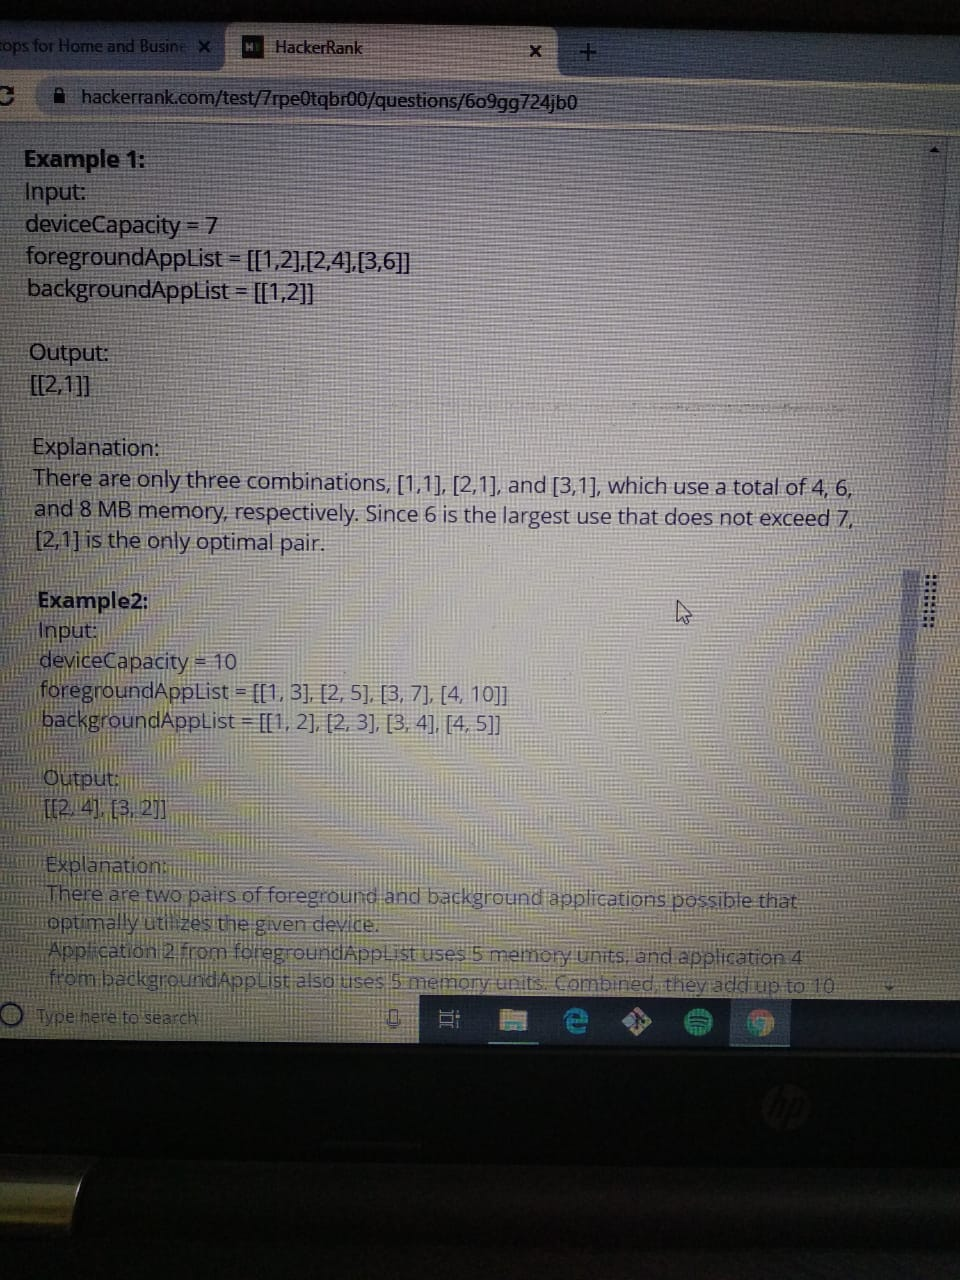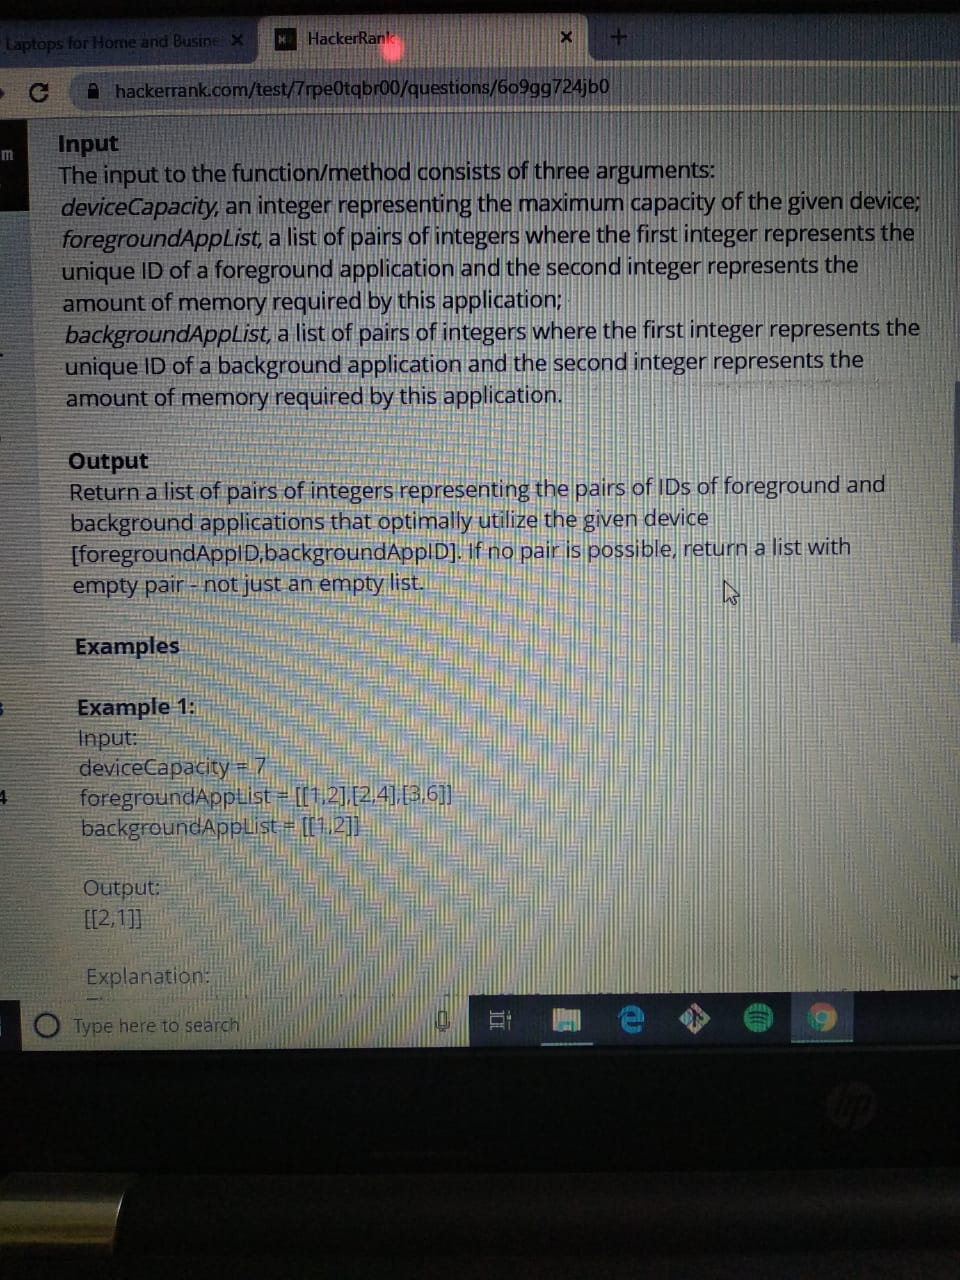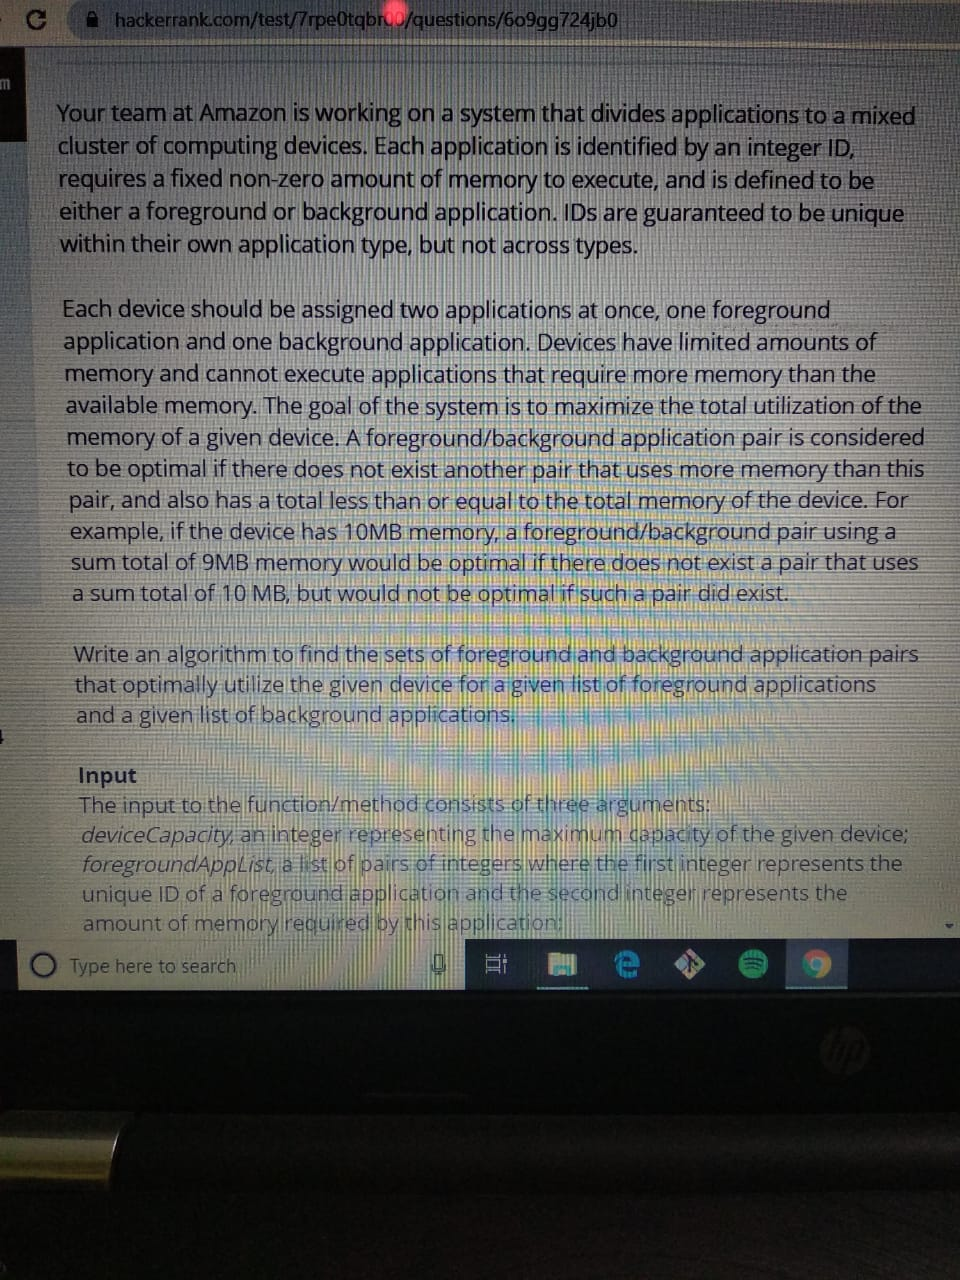

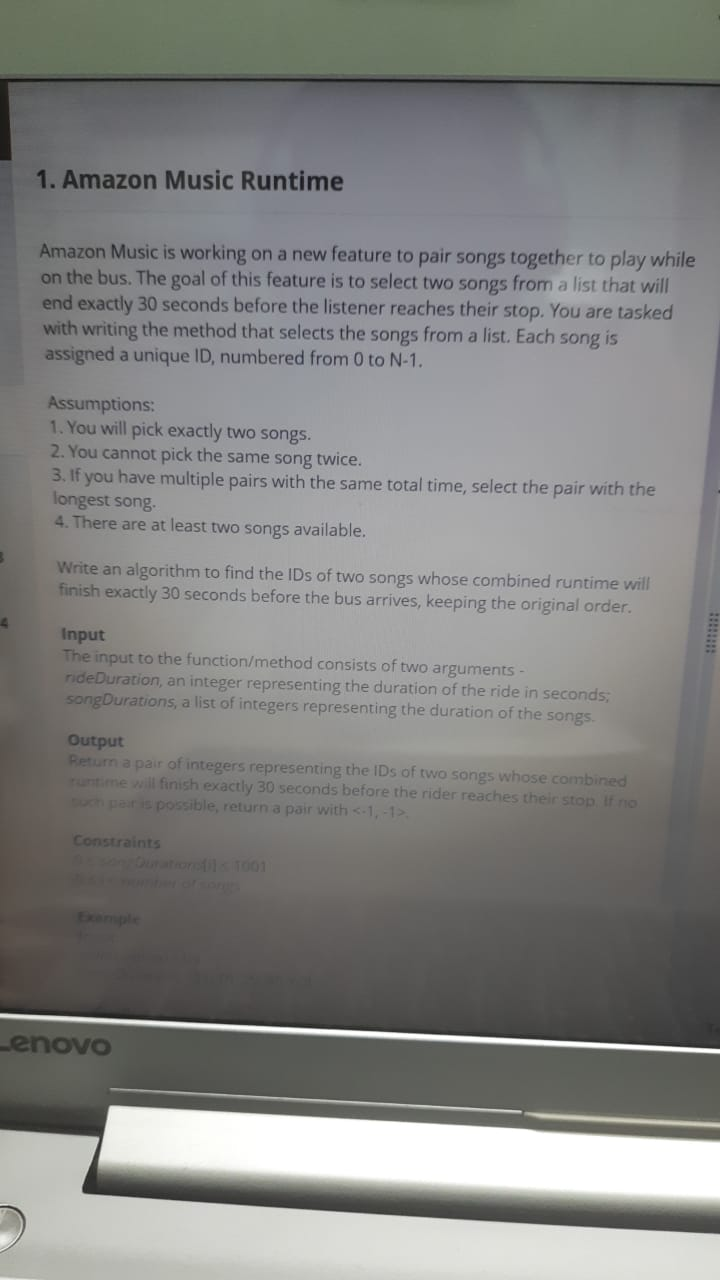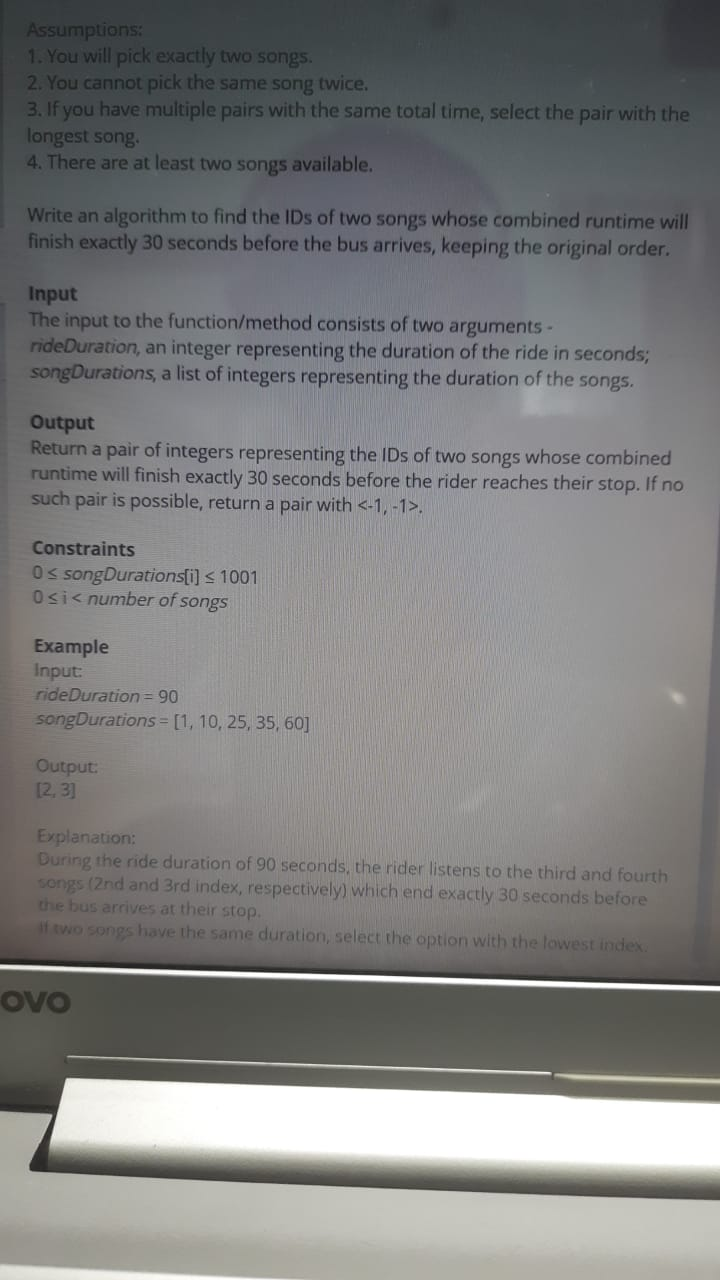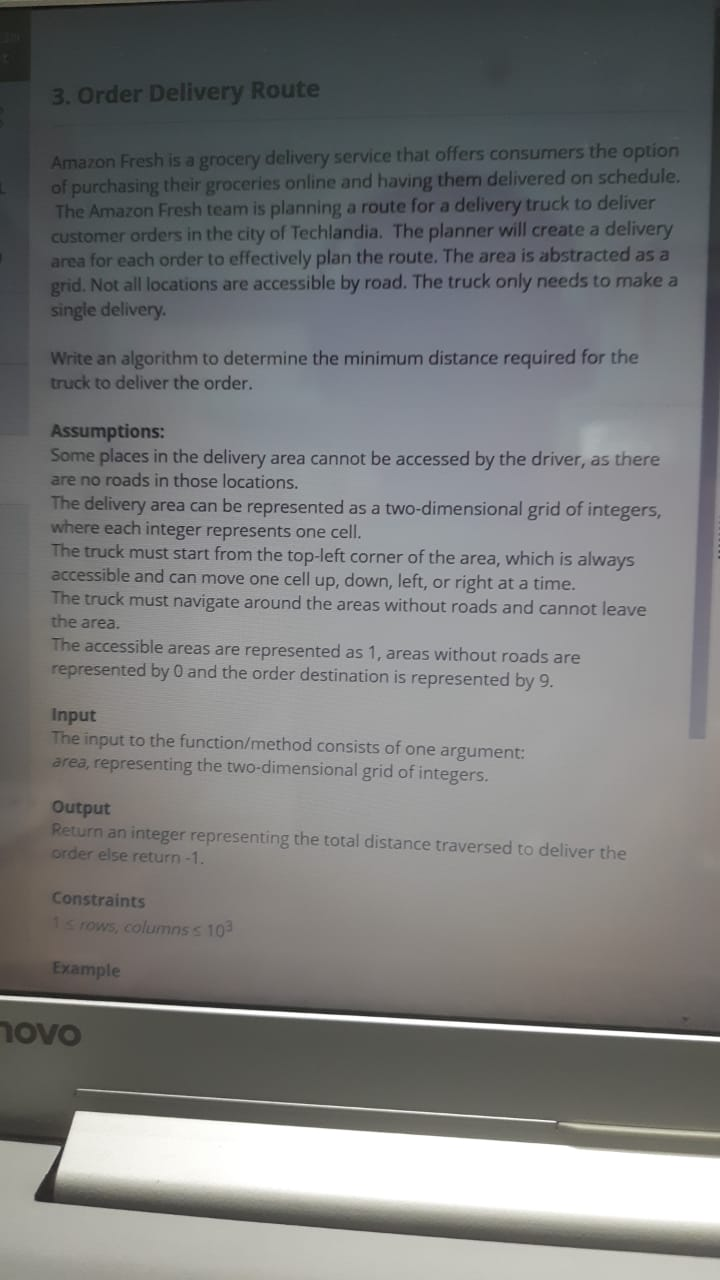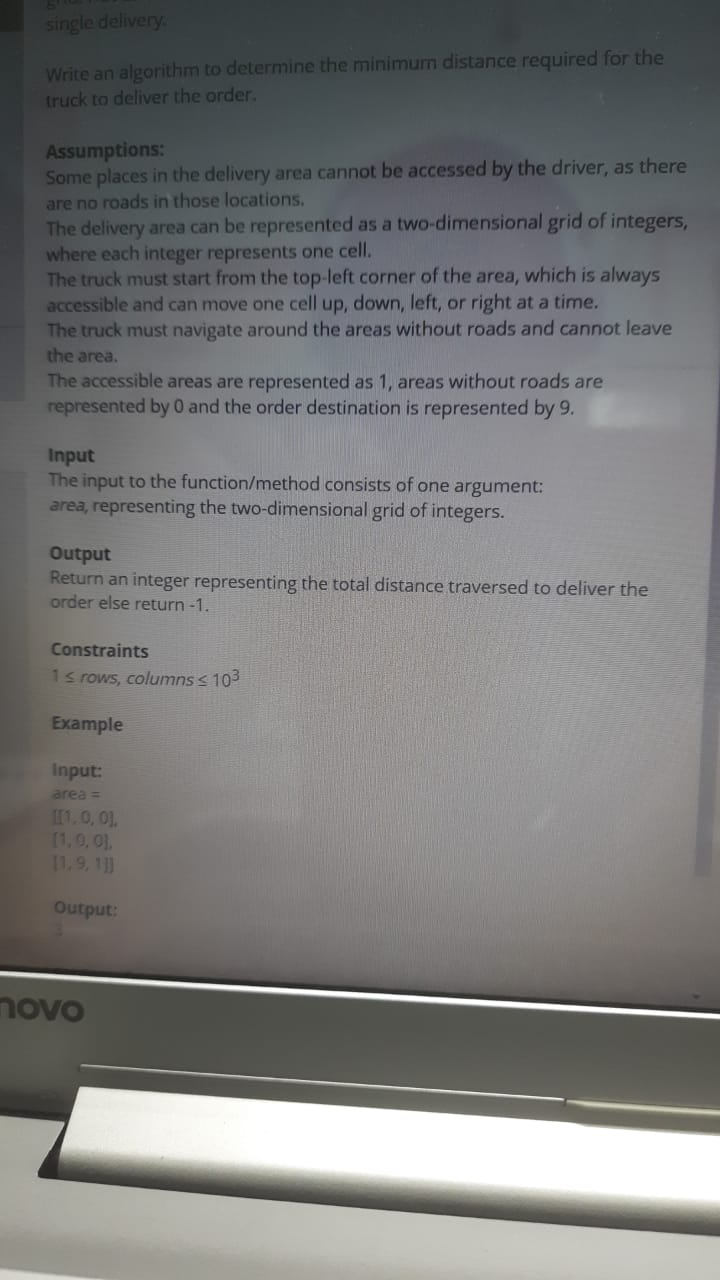

In [ ]:
duration=int(input())
arr = list(map(int,input().split()))
t = {arr[i]:i for i in range(len(arr))}
result = []
for i in range(len(arr)):
    if duration-arr[i]-30 in t and t[duration-arr[i]-30] != i:
        result.append([i,t[duration-arr[i]-30]])
result.sort(key = lambda x:x[0])
return result[0]

# Amazon Fresh Deliveries
Given allLocations list of co-ordinates (x,y) you have to find the X - closest locations from truck's location which is (0,0). Distance is calculated using formula (x^2 + y^2).
If the there is tie then choose the co-ordinate with least x value.
Sample Input :
allLocations : [ [1, 2] , [1, -1], [3, 4] ]
numOfDeliveries : 2
Sample Output :
[ [1, -1], [1 , 2] ]
Output list can be in any order.
This question was basically K closest points to the origin (0,0) with added tie condition.



In [2]:
allLocations = [ [1, 2] , [1, -1], [3, 4] ]
numOfDeliveries = 2

from heapq import heappop, heappush
heap = []
for idx, location in enumerate( allLocations ):
    heappush(heap, (location[0]**2 + location[1]**2, location[0], idx))
    
res = []
while numOfDeliveries != 0:
    res.append(allLocations[ heappop(heap)[2] ])
    numOfDeliveries -=1
print(res)
# return res

[[1, -1], [1, 2]]


In [1]:
def solve(foreground,background,target):
    temp = float("-inf")
    foreground.sort(key=lambda x:x[1])
    background.sort(key=lambda x:x[1])
    left = 0
    right = len(background)-1
    res = []
    while left<len(foreground) and right>=0:
        sum_value = foreground[left][1] + background[right][1]
        if sum_value > target:
            right-=1
        else:
            if temp <= sum_value:
                if temp <sum_value:
                    res = []
                    temp = sum_value
                res.append([foreground[left][0],background[right][0]])
                count = right
                
                while count >0 and background[count][1] == background[count-1][1]:
                    res.append([foreground[left][0],background[count-1][0]])
                    count-=1
            left+=1
    if not res:
        return [[]]
    return res
a, b, target = [ [1, 5], [2, 5] ], [ [1, 5], [2, 5] ], 10
solve(a,b,target)

[[1, 2], [1, 1], [2, 2], [2, 1]]

In [ ]:
# let say we have 